In [10]:
from fastai.vision.all import *
from PIL import Image,ImageDraw
import tqdm

In [11]:
in_path = Path('src/LIVECell_dataset_2021/images/png')
ann_path = Path('src/LIVECell_dataset_2021/annotations/LIVECell')
out_path = Path('src/LIVECell_dataset_2021/images/masks')
out_path.mkdir(exist_ok = True)

In [12]:
def load_annots(fn):
    with open(fn) as f:
        annots = json.load(f)
    return annots

json_train = load_annots(ann_path / 'livecell_coco_train.json')
json_val = load_annots(ann_path / 'livecell_coco_val.json')

In [13]:
def get_image_df(json_data):
    image_ids = []
    for o in json_data['images']:
        image_ids.append((o['id'], o['file_name'], o['width'], o['height']))
        
    return pd.DataFrame(image_ids, columns = ['id', 'file_name', 'width', 'height'])

In [14]:
def get_annot_df(json_data):
    annots = []
    for key in json_data['annotations'].keys():
        o = json_data['annotations'][key]
        annots.append((o['image_id'], o['category_id'], o['segmentation'], o['area'], o['bbox'], o['iscrowd']))
    return pd.DataFrame(annots, columns = ['image_id', 'category_id', 'segmentation', 'area', 'bbox', 'iscrowd'])

In [15]:
def get_df(json_data):
    image_df = get_image_df(json_data)
    annots_df = get_annot_df(json_data)
    
    df = pd.merge(image_df, annots_df, left_on = 'id', right_on = 'image_id', how = 'right', right_index = False)
    
    return df.drop('image_id', axis = 1)

In [16]:
df_train = get_df(json_train)
df_val = get_df(json_val)

In [17]:
df_train['is_valid'] = False
df_val['is_valid'] = True

In [18]:
df = pd.concat([df_train, df_val]).reset_index(drop = True)
df.tail()

,id,file_name,width,height,category_id,segmentation,area,bbox,iscrowd,is_valid
1200181,1617270,SHSY5Y_Phase_B10_2_00d16h00m_2.tif,704,520,1,"[[437.39, 115.57, 436.45, 116.83, 435.66, 118.4, 434.88, 119.65, 431.43, 125.14, 430.17, 127.03, 429.07, 128.91, 428.29, 130.64, 427.97, 132.83, 427.97, 134.4, 427.97, 136.6, 427.03, 138.17, 424.84, 138.17, 423.58, 137.38, 423.58, 134.24, 424.05, 132.68, 424.99, 131.11, 425.93, 128.91, 427.35, 126.4, 431.9, 119.18, 435.04, 112.9, 434.88, 112.59, 434.88, 112.59, 433.62, 111.49, 432.84, 109.92, 431.74, 108.2, 429.86, 106.31, 427.82, 105.06, 424.84, 104.27, 421.85, 103.8, 418.87, 103.65, 417.15, 101.45, 416.05, 100.04, 415.74, 98.16, 413.07, 95.96, 410.71, 93.29, 410.87, 91.09, 412.44, 90.62,...",520.20720,"[410.71, 87.8, 39.39000000000004, 50.36999999999999]",0,True
1200182,1617270,SHSY5Y_Phase_B10_2_00d16h00m_2.tif,704,520,1,"[[440.35, 463.72, 441.03, 466.63, 441.2, 469.02, 440.86, 471.41, 439.49, 472.1, 438.98, 475.69, 437.95, 479.62, 437.27, 483.55, 435.73, 485.6, 434.02, 485.6, 433.68, 485.6, 432.65, 484.4, 433.34, 483.21, 433.68, 480.47, 434.53, 477.05, 435.39, 473.12, 435.73, 470.05, 436.07, 467.14, 435.22, 463.04, 434.02, 461.33, 432.83, 459.79, 431.03, 457.57, 429.48, 454.83, 427.75, 451.93, 425.72, 448.85, 424.96, 445.09, 424.96, 442.7, 424.96, 438.94, 423.94, 436.54, 423.42, 433.98, 422.64, 431.08, 422.1, 428.16, 421.37, 425.95, 418.13, 424.07, 416.25, 421.85, 413.34, 420.31, 409.07, 417.57, 409.07, 41...",753.30275,"[409.07, 412.61, 46.49000000000001, 72.99000000000001]",0,True
1200183,1617270,SHSY5Y_Phase_B10_2_00d16h00m_2.tif,704,520,1,"[[91.82, 501.16, 90.29, 502.86, 88.92, 504.92, 87.21, 507.14, 85.67, 509.02, 83.96, 511.41, 82.59, 513.46, 81.74, 515.34, 81.06, 517.56, 80.03, 519.27, 79.18, 519.27, 78.66, 518.42, 77.81, 516.54, 77.47, 515.34, 79.52, 513.63, 80.71, 511.92, 81.23, 510.21, 82.25, 507.82, 83.28, 504.92, 84.82, 502.69, 86.53, 500.13, 88.24, 498.42, 89.6, 496.54, 89.94, 494.83, 91.31, 491.93, 93.02, 489.53, 94.9, 487.31, 97.81, 485.09, 100.37, 482.87, 101.91, 482.52, 103.96, 482.18, 106.18, 481.84, 107.89, 481.84, 109.09, 481.16, 110.8, 479.62, 112.85, 478.42, 114.73, 477.4, 117.12, 476.2, 118.49, 473.81, 120...",479.91530,"[77.47, 462.35, 56.56999999999999, 56.91999999999996]",0,True
1200184,1617270,SHSY5Y_Phase_B10_2_00d16h00m_2.tif,704,520,1,"[[354.85, 393.77, 354.23, 392.83, 353.44, 391.26, 352.19, 390.48, 351.87, 392.2, 351.4, 393.62, 350.93, 395.66, 350.46, 397.22, 350.46, 398.95, 350.15, 400.68, 350.15, 402.72, 350.15, 404.29, 349.05, 405.54, 348.26, 407.42, 347.48, 409.31, 346.7, 411.66, 345.75, 413.39, 344.97, 415.58, 343.87, 417.62, 343.4, 419.66, 342.62, 422.02, 342.3, 425.0, 341.99, 426.41, 341.83, 428.14, 341.83, 429.86, 341.83, 432.06, 341.83, 433.78, 341.83, 436.45, 341.36, 438.02, 341.52, 438.81, 341.52, 438.81, 340.89, 439.85, 340.89, 440.32, 340.26, 442.52, 339.95, 443.77, 339.95, 446.28, 339.63, 448.17, 338.69, ...",465.32005,"[335.55, 390.48, 19.620000000000005, 85.71999999999997]",0,True
1200185,1617270,SHSY5Y_Phase_B10_2_00d16h00m_2.tif,704,520,1,"[[334.61, 146.01, 333.52, 147.11, 332.26, 148.05, 331.32, 148.84, 329.75, 149.31, 327.87, 150.41, 326.14, 151.5, 323.94, 152.92, 321.9, 154.64, 319.86, 156.05, 319.71, 156.21, 319.71, 156.21, 319.24, 155.11, 318.29, 153.7, 317.51, 150.56, 317.35, 146.95, 316.73, 143.5, 316.88, 141.15, 317.35, 138.01, 318.45, 135.81, 320.02, 133.62, 321.43, 130.32, 321.9, 127.03, 322.22, 121.85, 323.0, 114.79, 323.0, 106.79, 324.57, 108.2, 325.98, 111.34, 327.08, 114.0, 326.92, 116.2, 326.61, 118.55, 326.3, 120.91, 326.14, 123.73, 326.14, 126.56, 326.3, 128.75, 327.4, 130.32, 328.65, 132.36, 330.22, 132.36,...",809.03835,"[316.73, 106.79, 50.20999999999998, 49.42]",0,True


## Fix category

In [10]:
def get_cell_name(fn):
    return re.search('(.*)_Phase_.*.tif', fn).group(1)

In [11]:
df['cell_type'] = df.file_name.apply(get_cell_name)
df.drop('category_id', axis = 1, inplace = True)

In [13]:
df.tail(2)

,id,file_name,width,height,segmentation,area,bbox,iscrowd,is_valid,cell_type
1200184,1617270,SHSY5Y_Phase_B10_2_00d16h00m_2.tif,704,520,"[[354.85, 393.77, 354.23, 392.83, 353.44, 391.26, 352.19, 390.48, 351.87, 392.2, 351.4, 393.62, 350.93, 395.66, 350.46, 397.22, 350.46, 398.95, 350.15, 400.68, 350.15, 402.72, 350.15, 404.29, 349.05, 405.54, 348.26, 407.42, 347.48, 409.31, 346.7, 411.66, 345.75, 413.39, 344.97, 415.58, 343.87, 417.62, 343.4, 419.66, 342.62, 422.02, 342.3, 425.0, 341.99, 426.41, 341.83, 428.14, 341.83, 429.86, 341.83, 432.06, 341.83, 433.78, 341.83, 436.45, 341.36, 438.02, 341.52, 438.81, 341.52, 438.81, 340.89, 439.85, 340.89, 440.32, 340.26, 442.52, 339.95, 443.77, 339.95, 446.28, 339.63, 448.17, 338.69, ...",465.32005,"[335.55, 390.48, 19.620000000000005, 85.71999999999997]",0,True,SHSY5Y
1200185,1617270,SHSY5Y_Phase_B10_2_00d16h00m_2.tif,704,520,"[[334.61, 146.01, 333.52, 147.11, 332.26, 148.05, 331.32, 148.84, 329.75, 149.31, 327.87, 150.41, 326.14, 151.5, 323.94, 152.92, 321.9, 154.64, 319.86, 156.05, 319.71, 156.21, 319.71, 156.21, 319.24, 155.11, 318.29, 153.7, 317.51, 150.56, 317.35, 146.95, 316.73, 143.5, 316.88, 141.15, 317.35, 138.01, 318.45, 135.81, 320.02, 133.62, 321.43, 130.32, 321.9, 127.03, 322.22, 121.85, 323.0, 114.79, 323.0, 106.79, 324.57, 108.2, 325.98, 111.34, 327.08, 114.0, 326.92, 116.2, 326.61, 118.55, 326.3, 120.91, 326.14, 123.73, 326.14, 126.56, 326.3, 128.75, 327.4, 130.32, 328.65, 132.36, 330.22, 132.36,...",809.03835,"[316.73, 106.79, 50.20999999999998, 49.42]",0,True,SHSY5Y


## Remove file ending

In [14]:
df['file_name'] = df['file_name'].str[:-4]

## Build Mask

In [121]:
## Includes RatC6 Cell Line
items = get_image_files(in_path)
print(len(items))

4184


In [128]:
my_fn = items[0]
my_id = my_fn.stem
my_annots = df.loc[df['file_name'] == my_id, 'segmentation'].to_list()
my_annot = my_annots[1]

In [129]:
my_annot

[[86.76,
  179.35,
  88.64,
  181.23,
  89.82,
  182.88,
  90.76,
  183.82,
  91.46,
  185.23,
  91.93,
  185.7,
  93.58,
  186.64,
  95.46,
  187.81,
  97.34,
  188.28,
  99.22,
  188.28,
  101.1,
  188.28,
  103.45,
  189.93,
  104.86,
  190.63,
  105.8,
  190.87,
  106.97,
  191.1,
  108.62,
  190.87,
  109.56,
  190.16,
  110.73,
  188.99,
  110.97,
  186.4,
  110.97,
  184.52,
  111.44,
  182.17,
  111.91,
  181.0,
  112.38,
  179.12,
  113.32,
  177.24,
  113.79,
  174.89,
  111.67,
  175.83,
  110.26,
  176.3,
  108.15,
  176.77,
  106.74,
  176.77,
  104.62,
  176.77,
  102.04,
  176.06,
  99.69,
  175.83,
  97.34,
  175.12,
  91.93,
  174.42,
  90.76,
  174.42,
  89.11,
  174.42,
  88.17,
  174.42,
  86.53,
  175.12,
  86.06,
  177.0]]

In [152]:
def poly2mask(poly_list):
    img = Image.new('L', (704, 520), 0)
    ImageDraw.Draw(img).polygon(poly_list[0], outline=1, fill=1)
    mask = np.array(img, dtype = np.uint8)
    return np.asfortranarray(mask)

In [155]:
my_mask = poly2mask(my_annot)

In [160]:
def plot_masks(fn, colors=False):
    labels = df[df["file_name"] == fn.stem]["segmentation"].tolist()

    mask = np.zeros((520, 704))
    for label in labels:
        mask += poly2mask(label)
    mask = mask.clip(0, 1)

    #image = cv2.imread(f"../input/sartorius-cell-instance-segmentation/train/{image_id}.png")
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    image = Image.open(fn)
        
    plt.figure(figsize=(16, 32))
    plt.subplot(3, 1, 1)
    plt.imshow(image)
    plt.axis("off")
    plt.subplot(3, 1, 2)
    plt.imshow(image)
    plt.imshow(mask, alpha=0.5)
    plt.axis("off")
    plt.subplot(3, 1, 3)
    plt.imshow(mask)
    plt.axis("off")
    
    plt.show();

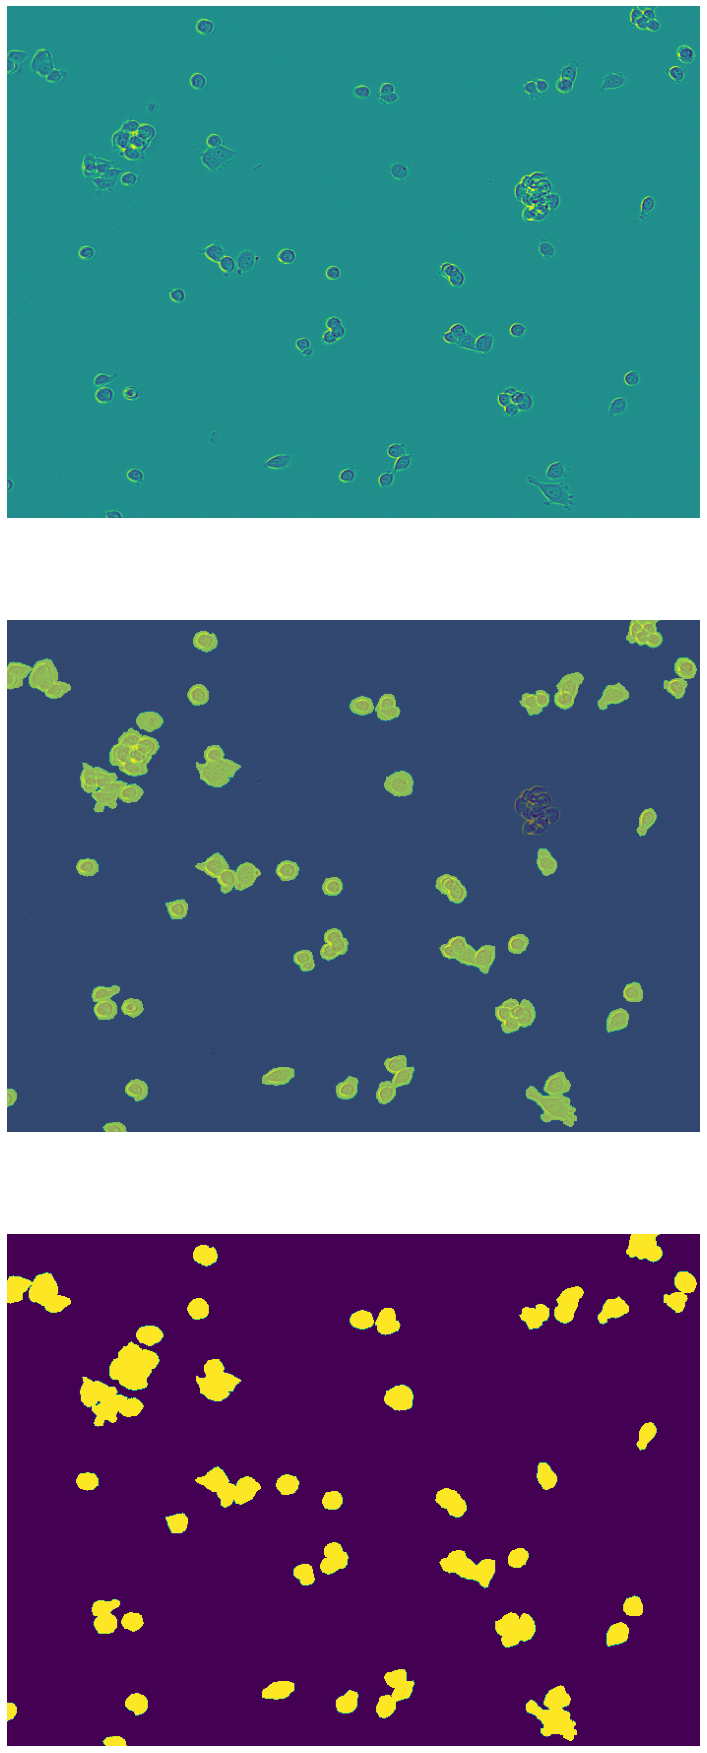

In [164]:
plot_masks(my_fn)

In [165]:
def build_mask(fn):
    temp_annot = df.loc[df['file_name'] == fn.stem, 'segmentation'].to_list()
    mask = np.zeros((520, 704))
    for label in temp_annot:
        mask += poly2mask(label)
    mask = mask.clip(0, 1)
    return mask

In [166]:
build_mask(my_fn)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [181]:
## make shure only images that have annotations are passed to save_masks (RatC6 does not)
unique_filenames = df.file_name.unique()
print('Number of annotated images: ', len(unique_filenames))
print('Number of images: ', len(items))
annot_items = L([fn for fn in items if fn.stem in unique_filenames])
assert(len(annot_items) == len(unique_filenames))

Number of annotated images:  3727
Number of images:  4184


In [171]:
def save_masks(items):
    for fn in tqdm.tqdm(items):
        mask_arr = (build_mask(fn) * 1).astype(np.uint8)
        mask_img = Image.fromarray(mask_arr)
        mask_img.save(out_path / fn.name)

In [182]:
save_masks(annot_items)

100%|██████████| 3727/3727 [14:35<00:00,  4.26it/s]


In [ ]:
#!zip -r masks.zip masks

In [16]:
df.to_csv('src/LIVECell_dataset_2021/livecell_train_val.csv')

In [17]:
df.tail()

,id,file_name,width,height,segmentation,area,bbox,iscrowd,is_valid,cell_type
1200181,1617270,SHSY5Y_Phase_B10_2_00d16h00m_2,704,520,"[[437.39, 115.57, 436.45, 116.83, 435.66, 118.4, 434.88, 119.65, 431.43, 125.14, 430.17, 127.03, 429.07, 128.91, 428.29, 130.64, 427.97, 132.83, 427.97, 134.4, 427.97, 136.6, 427.03, 138.17, 424.84, 138.17, 423.58, 137.38, 423.58, 134.24, 424.05, 132.68, 424.99, 131.11, 425.93, 128.91, 427.35, 126.4, 431.9, 119.18, 435.04, 112.9, 434.88, 112.59, 434.88, 112.59, 433.62, 111.49, 432.84, 109.92, 431.74, 108.2, 429.86, 106.31, 427.82, 105.06, 424.84, 104.27, 421.85, 103.8, 418.87, 103.65, 417.15, 101.45, 416.05, 100.04, 415.74, 98.16, 413.07, 95.96, 410.71, 93.29, 410.87, 91.09, 412.44, 90.62,...",520.20720,"[410.71, 87.8, 39.39000000000004, 50.36999999999999]",0,True,SHSY5Y
1200182,1617270,SHSY5Y_Phase_B10_2_00d16h00m_2,704,520,"[[440.35, 463.72, 441.03, 466.63, 441.2, 469.02, 440.86, 471.41, 439.49, 472.1, 438.98, 475.69, 437.95, 479.62, 437.27, 483.55, 435.73, 485.6, 434.02, 485.6, 433.68, 485.6, 432.65, 484.4, 433.34, 483.21, 433.68, 480.47, 434.53, 477.05, 435.39, 473.12, 435.73, 470.05, 436.07, 467.14, 435.22, 463.04, 434.02, 461.33, 432.83, 459.79, 431.03, 457.57, 429.48, 454.83, 427.75, 451.93, 425.72, 448.85, 424.96, 445.09, 424.96, 442.7, 424.96, 438.94, 423.94, 436.54, 423.42, 433.98, 422.64, 431.08, 422.1, 428.16, 421.37, 425.95, 418.13, 424.07, 416.25, 421.85, 413.34, 420.31, 409.07, 417.57, 409.07, 41...",753.30275,"[409.07, 412.61, 46.49000000000001, 72.99000000000001]",0,True,SHSY5Y
1200183,1617270,SHSY5Y_Phase_B10_2_00d16h00m_2,704,520,"[[91.82, 501.16, 90.29, 502.86, 88.92, 504.92, 87.21, 507.14, 85.67, 509.02, 83.96, 511.41, 82.59, 513.46, 81.74, 515.34, 81.06, 517.56, 80.03, 519.27, 79.18, 519.27, 78.66, 518.42, 77.81, 516.54, 77.47, 515.34, 79.52, 513.63, 80.71, 511.92, 81.23, 510.21, 82.25, 507.82, 83.28, 504.92, 84.82, 502.69, 86.53, 500.13, 88.24, 498.42, 89.6, 496.54, 89.94, 494.83, 91.31, 491.93, 93.02, 489.53, 94.9, 487.31, 97.81, 485.09, 100.37, 482.87, 101.91, 482.52, 103.96, 482.18, 106.18, 481.84, 107.89, 481.84, 109.09, 481.16, 110.8, 479.62, 112.85, 478.42, 114.73, 477.4, 117.12, 476.2, 118.49, 473.81, 120...",479.91530,"[77.47, 462.35, 56.56999999999999, 56.91999999999996]",0,True,SHSY5Y
1200184,1617270,SHSY5Y_Phase_B10_2_00d16h00m_2,704,520,"[[354.85, 393.77, 354.23, 392.83, 353.44, 391.26, 352.19, 390.48, 351.87, 392.2, 351.4, 393.62, 350.93, 395.66, 350.46, 397.22, 350.46, 398.95, 350.15, 400.68, 350.15, 402.72, 350.15, 404.29, 349.05, 405.54, 348.26, 407.42, 347.48, 409.31, 346.7, 411.66, 345.75, 413.39, 344.97, 415.58, 343.87, 417.62, 343.4, 419.66, 342.62, 422.02, 342.3, 425.0, 341.99, 426.41, 341.83, 428.14, 341.83, 429.86, 341.83, 432.06, 341.83, 433.78, 341.83, 436.45, 341.36, 438.02, 341.52, 438.81, 341.52, 438.81, 340.89, 439.85, 340.89, 440.32, 340.26, 442.52, 339.95, 443.77, 339.95, 446.28, 339.63, 448.17, 338.69, ...",465.32005,"[335.55, 390.48, 19.620000000000005, 85.71999999999997]",0,True,SHSY5Y
1200185,1617270,SHSY5Y_Phase_B10_2_00d16h00m_2,704,520,"[[334.61, 146.01, 333.52, 147.11, 332.26, 148.05, 331.32, 148.84, 329.75, 149.31, 327.87, 150.41, 326.14, 151.5, 323.94, 152.92, 321.9, 154.64, 319.86, 156.05, 319.71, 156.21, 319.71, 156.21, 319.24, 155.11, 318.29, 153.7, 317.51, 150.56, 317.35, 146.95, 316.73, 143.5, 316.88, 141.15, 317.35, 138.01, 318.45, 135.81, 320.02, 133.62, 321.43, 130.32, 321.9, 127.03, 322.22, 121.85, 323.0, 114.79, 323.0, 106.79, 324.57, 108.2, 325.98, 111.34, 327.08, 114.0, 326.92, 116.2, 326.61, 118.55, 326.3, 120.91, 326.14, 123.73, 326.14, 126.56, 326.3, 128.75, 327.4, 130.32, 328.65, 132.36, 330.22, 132.36,...",809.03835,"[316.73, 106.79, 50.20999999999998, 49.42]",0,True,SHSY5Y
